In [1]:
%store -r df
%store -r KEYWORDS
%store -r noisy_punct
%store -r ks
%store -r map_
%store -r indices_of_first_attempts_per_user
%store -r sorted_users
%store -r INDICES
%store -r recipes_indices

importing Jupyter notebook from InsertsDelComparisons.ipynb


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


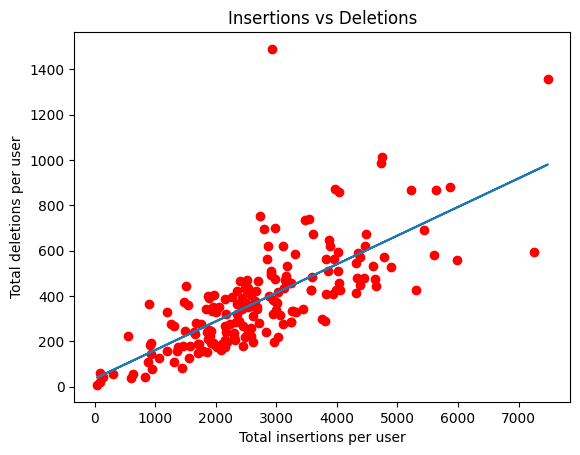

60fd1cafe3de7892fe9b3bd4
5a9bbda1f6dfdd0001ea9639
628781515f29a0394e23b15b
2022-09-04 14:01:31.746981 2022-09-04 14:48:49.568420
1873.37
2022-09-04 14:01:31.746981 2022-09-04 14:48:49.568420


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Helvetica


5aaeb037811b2000016f7e9f
62b33aa28046fcca091fad82
859    One-pot Chicken Basque\nServes 4\nTime 1 Hour\...
860    Macarons\nMakes 30\nTime 50 minutes\n\n\nEquip...
Name: recipe, dtype: object
[859, 860]
Stored 'sorted_users' (list)
Stored 'INDICES' (list)
2022-09-04 14:01:31.746981 2022-09-04 14:48:49.568420
2022-09-04 14:01:31.746981 2022-09-04 14:48:49.568420
2 1.0 7.0 


3 1.0 7.0 


72 1.0 100.0 


90 1.0 128.0 


204 2.0 90.0 


210 2.0 90.0 


265 3.0 76.0 


269 3.0 82.0 


297 3.0 132.0 


344 4.0 25.0 


406 5.0 16.0 


439 5.0 71.0 


448 5.0 97.0 


470 5.0 126.0 


477 5.0 139.0 


497 5.0 168.0 


5ba6f4fb8e137f000161b9d7
[(433, 58), (729, 107)]
[(745, 81)]
[(4, 1)]


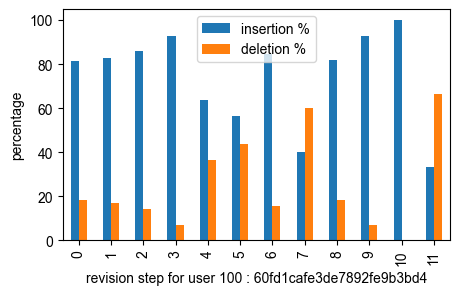

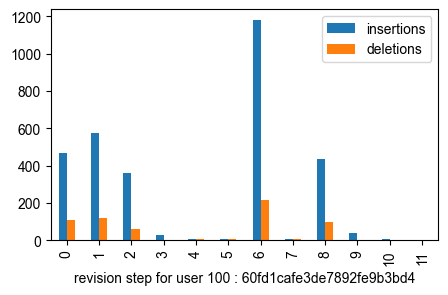

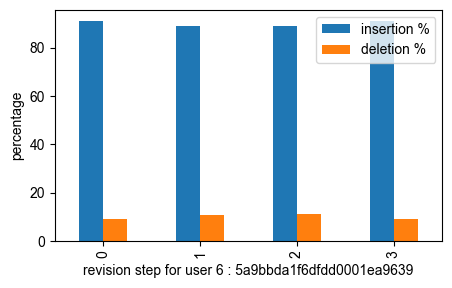

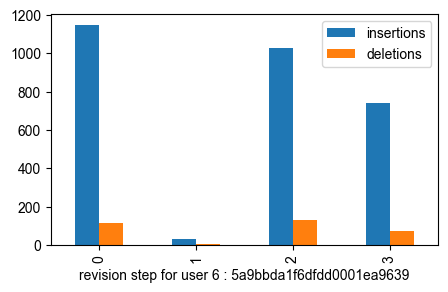

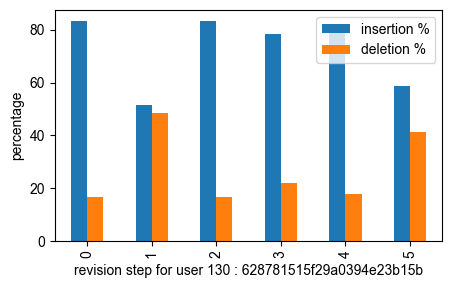

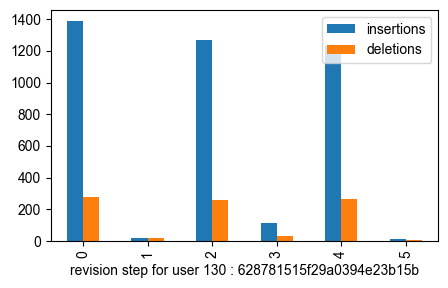

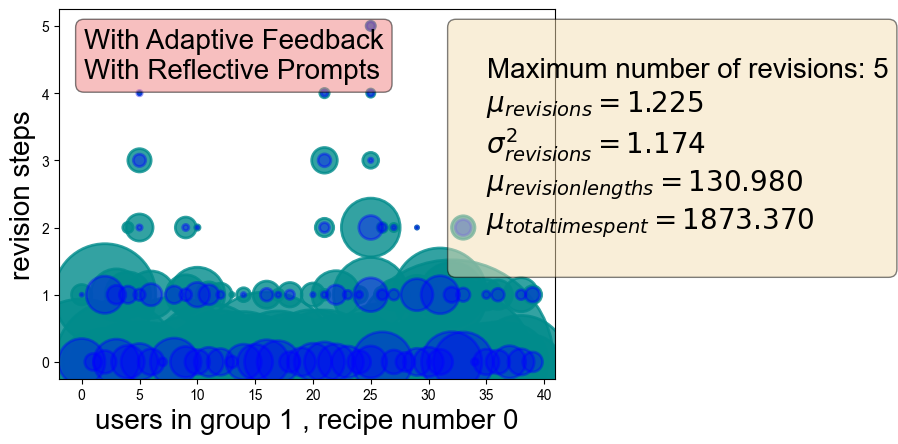

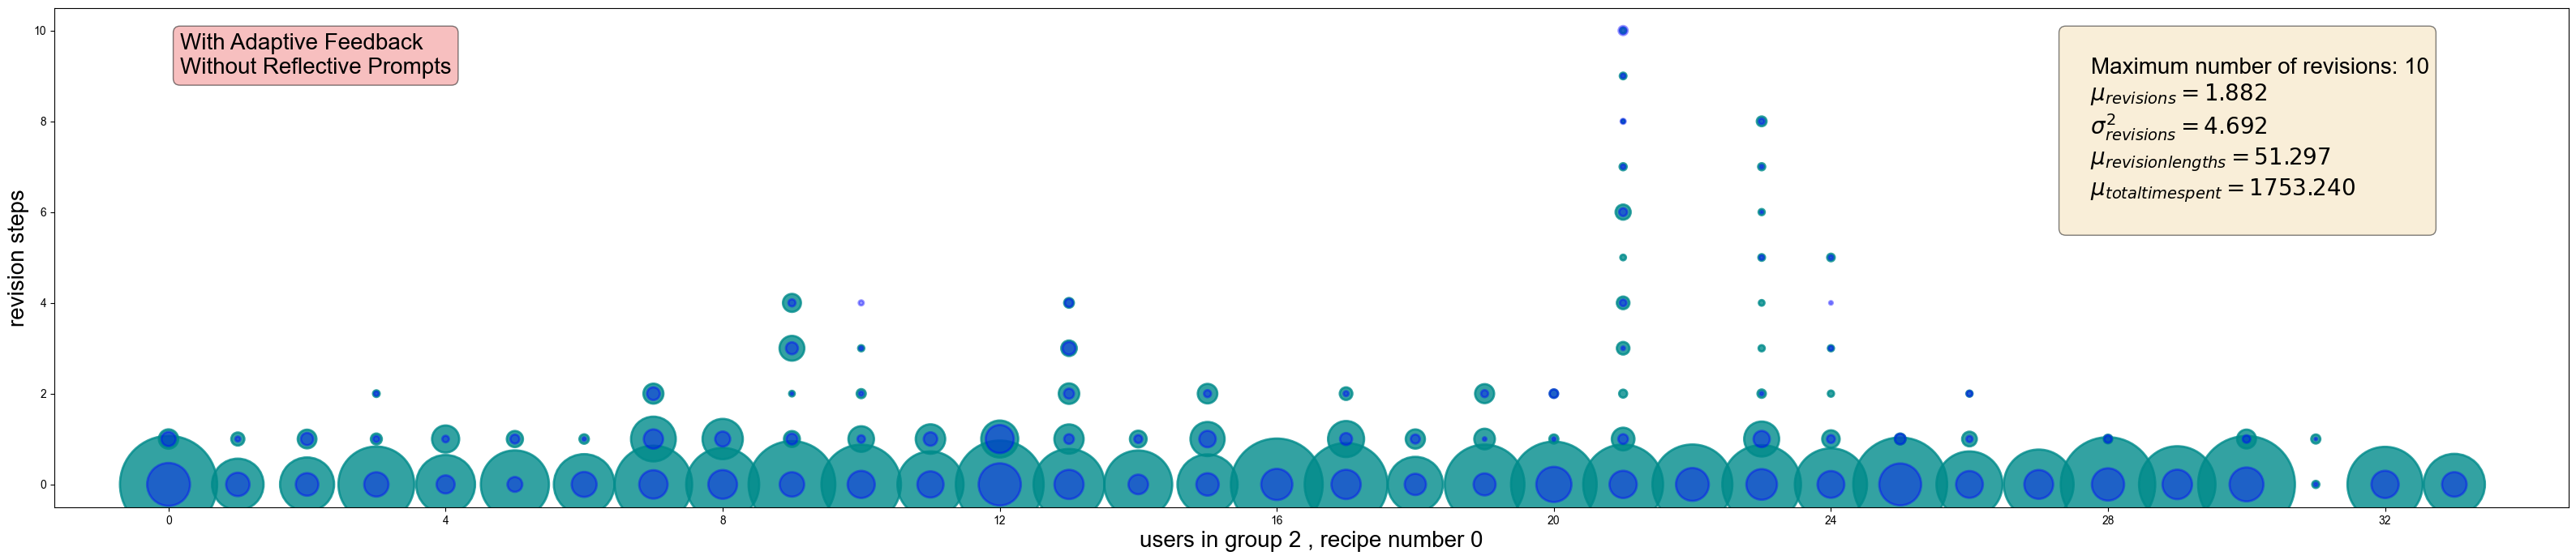

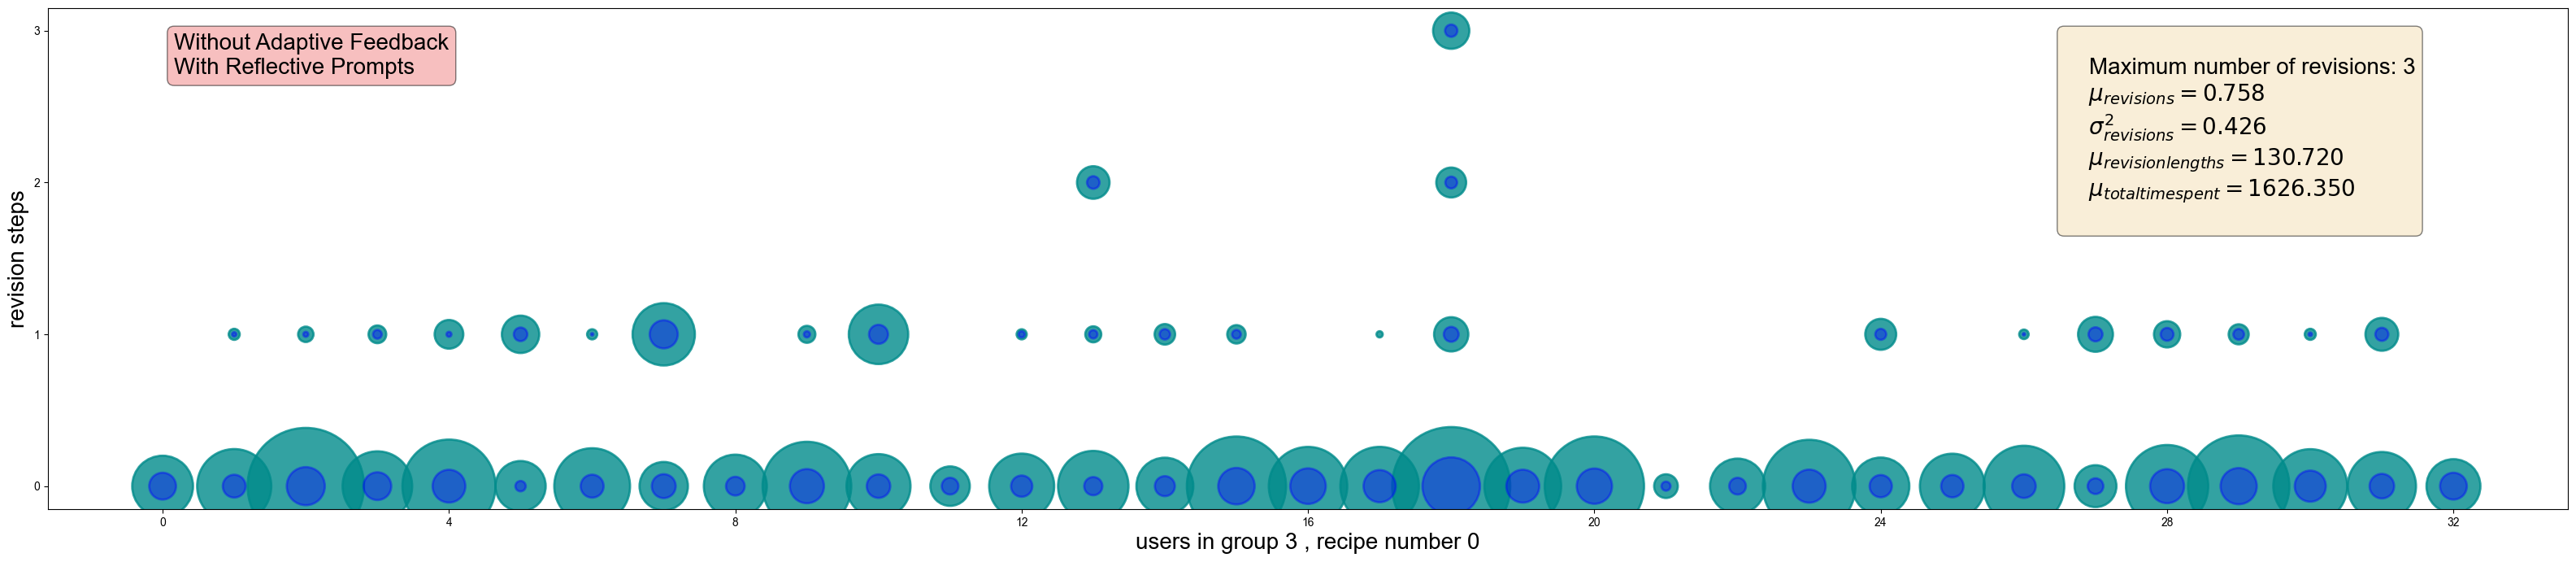

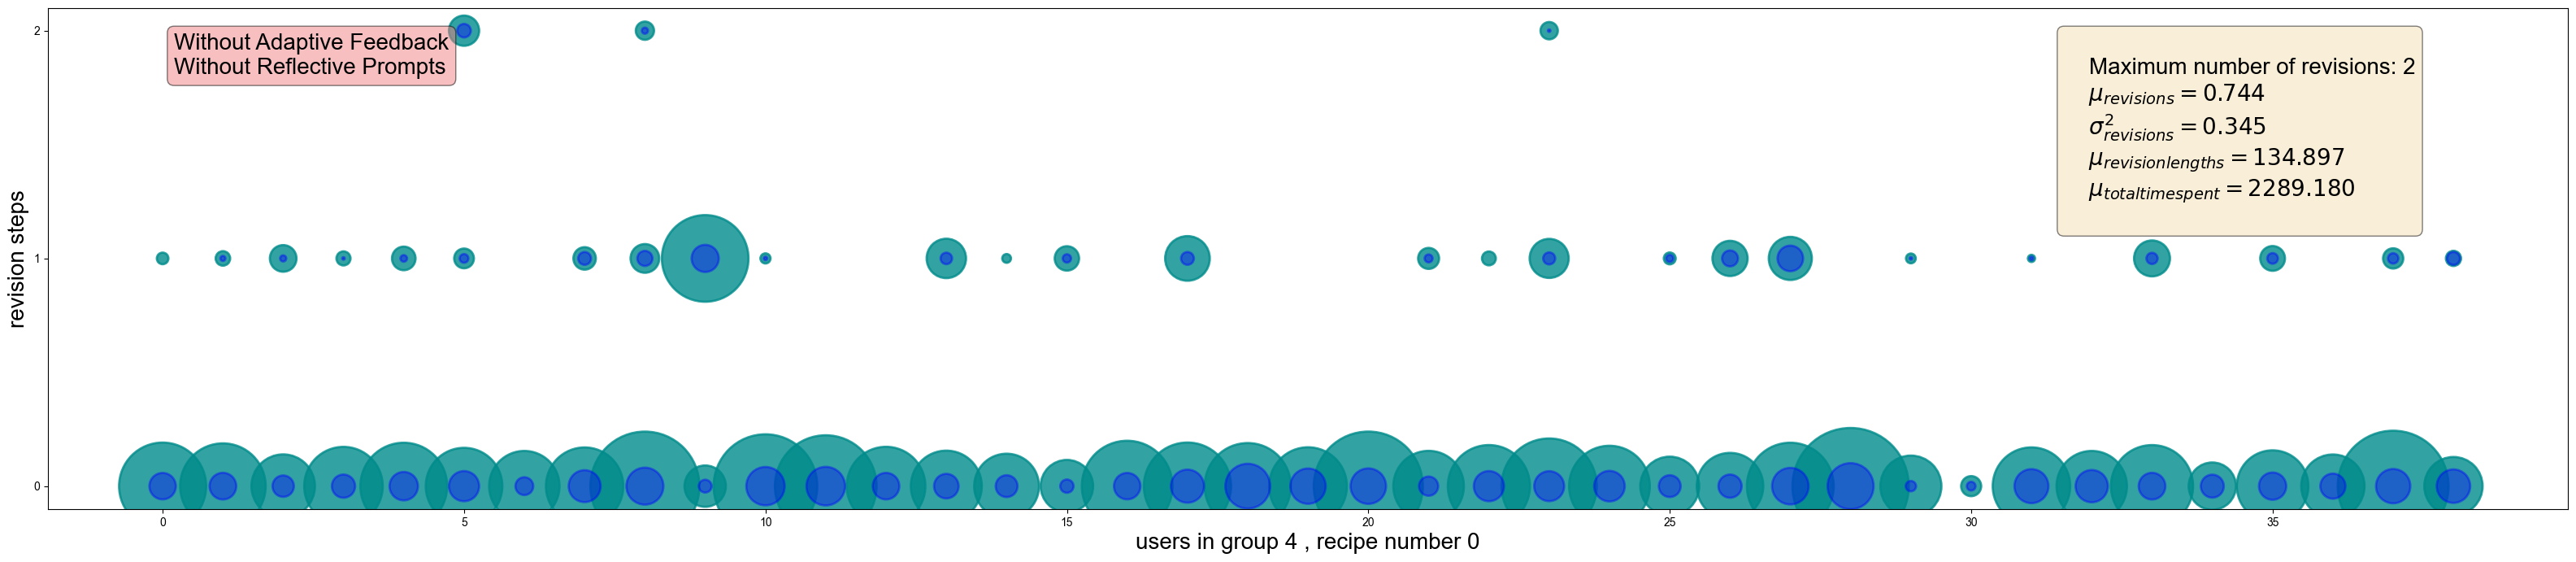

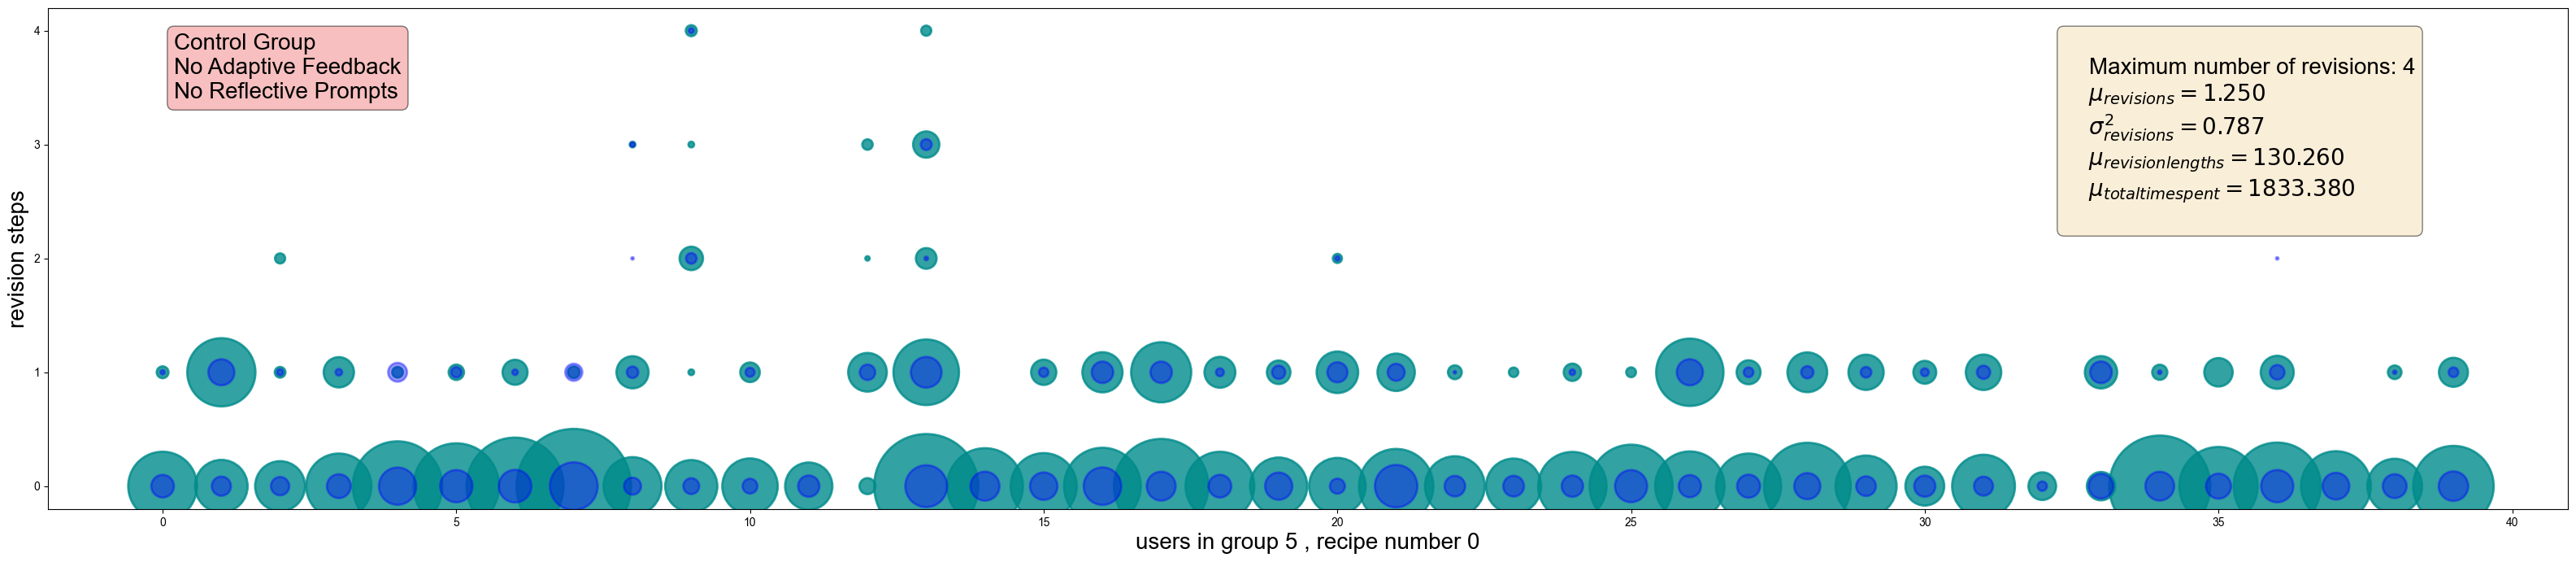

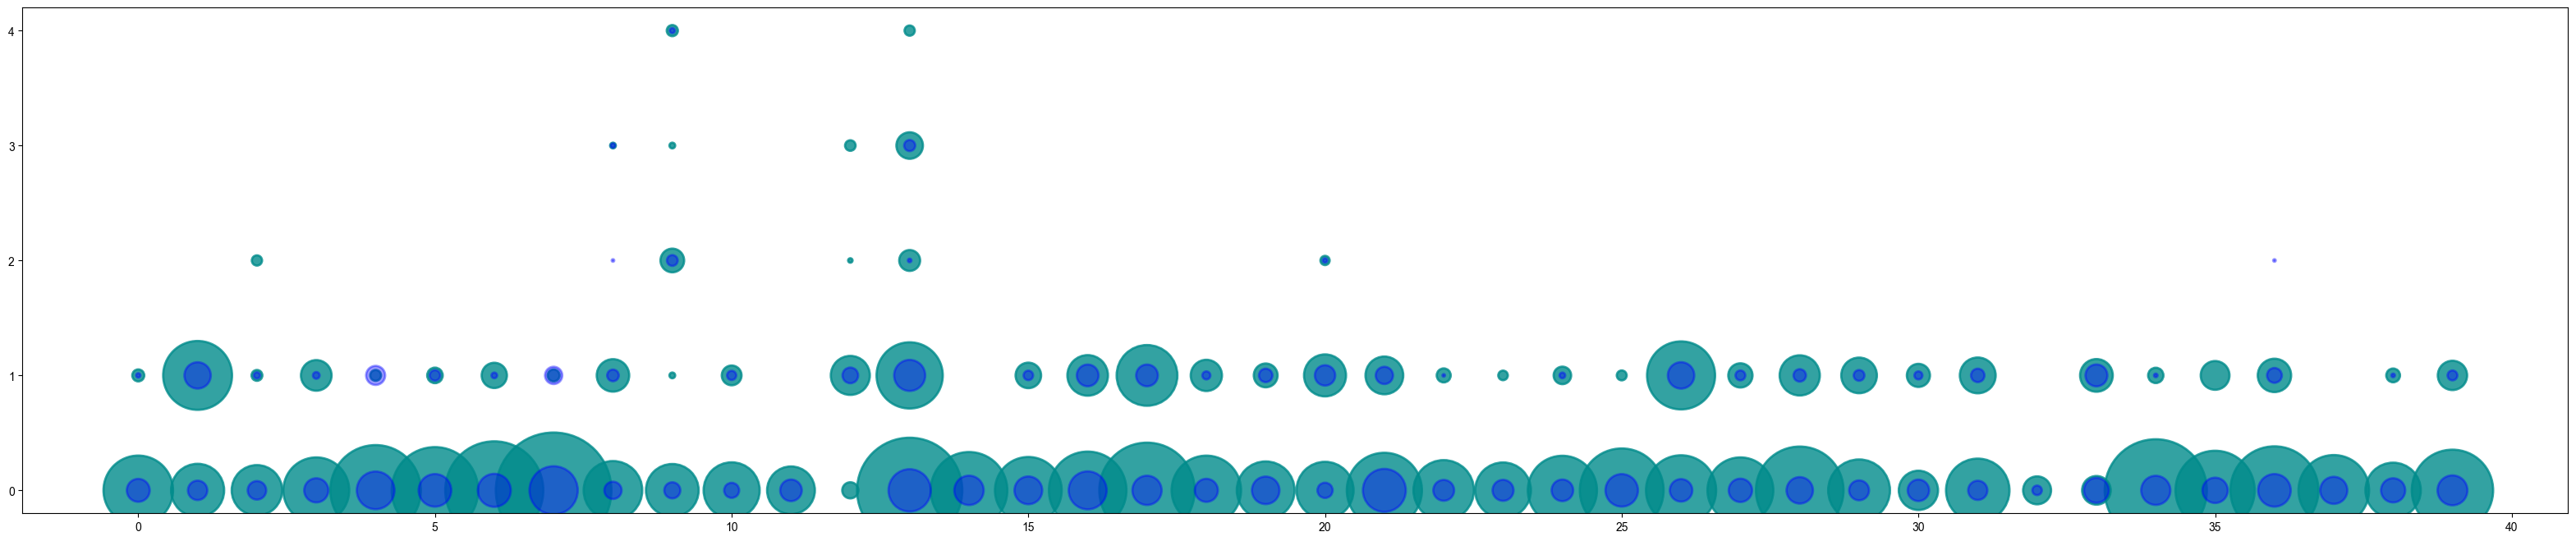

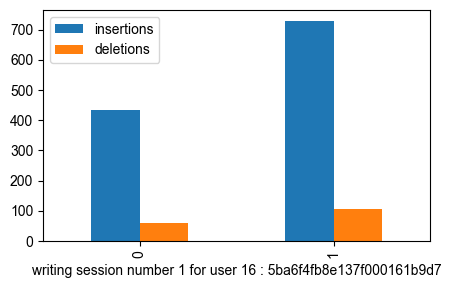

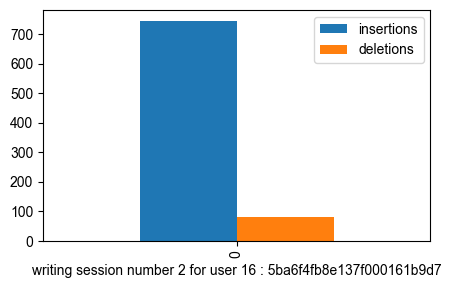

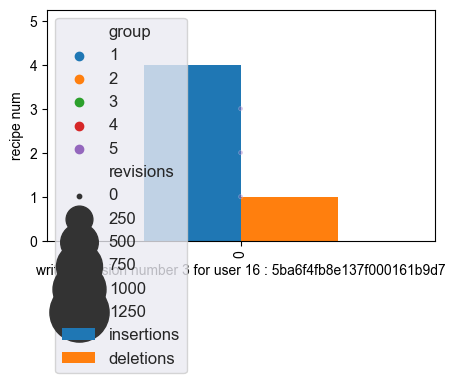

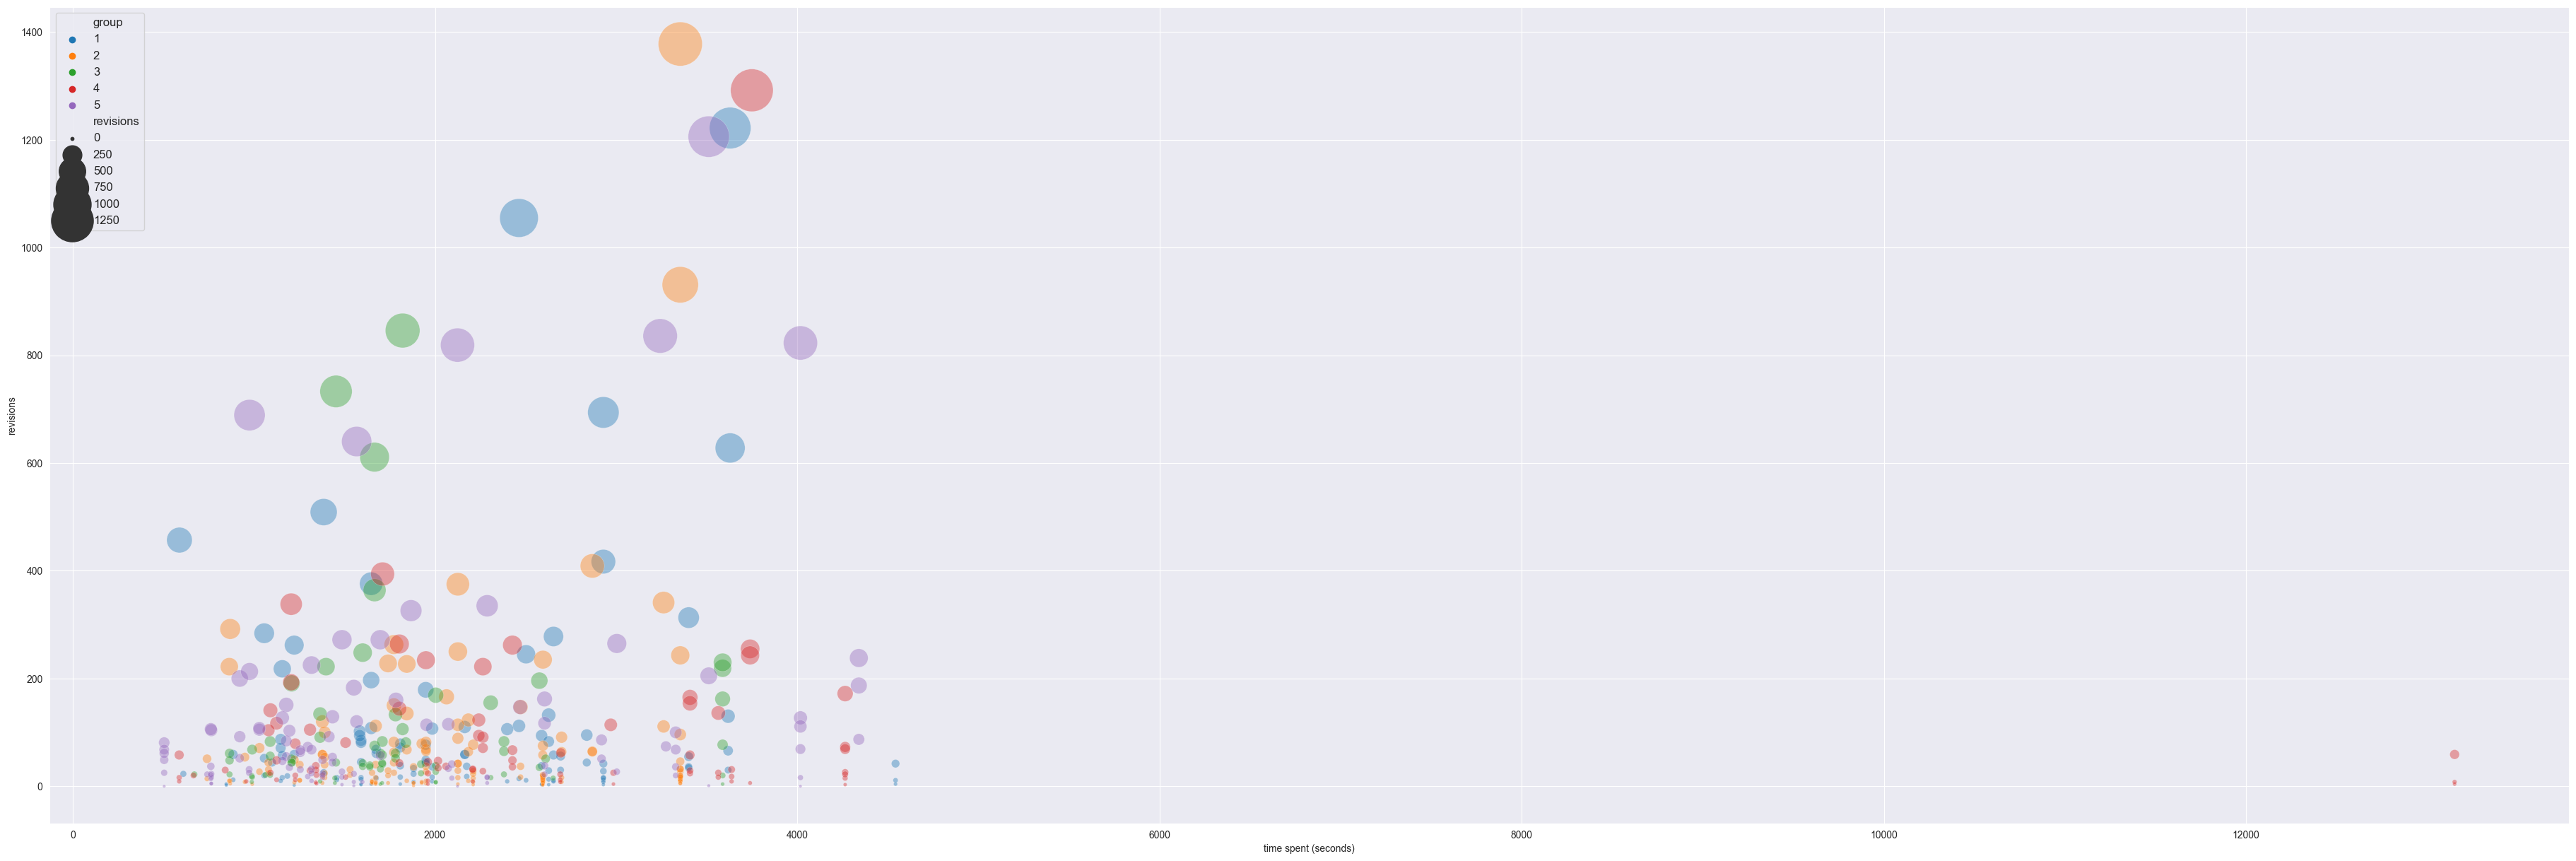

In [2]:
import import_ipynb
from InsertsDelComparisons import get_data_per_session, data_computation_on_groups
import numpy as np
import pandas as pd

In [3]:
import os
import pm4py
from pm4py.visualization.petri_net import  visualizer as pn_vis_factory
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.alpha import  algorithm as alpha_miner

def save_user_session_info_graph(csv_filepath, group_num):
    graph_data = csv_filepath
    dataframe = pd.read_csv(graph_data, sep=';')
    event_log = pm4py.format_dataframe(dataframe, case_id='case_id', activity_key='activity', timestamp_key='timestamp')
    event_log = pm4py.convert_to_event_log(dataframe)

    new_file = 'xes_format.xes'
    pm4py.write_xes(event_log, new_file)
    log = pm4py.read_xes(new_file)
    net, initial_marking, final_marking = pm4py.discover_petri_net_alpha(log)
    performance_dfg, start_activities, end_activities = pm4py.discover_performance_dfg(event_log)
    
    try:
        pm4py.save_vis_performance_dfg(performance_dfg, start_activities, end_activities, 'results/process mining/groupnum{n}.png'.format(n=group_num))
    except: print('user only has 1 recipe')

#pn_vis_factory(pn_vis_factory.apply(net, initial_marking, final_marking))

In [4]:
def get_durations(csv_filepath):
    dataframe = pd.read_csv(csv_filepath, sep=';')
    event_log = pm4py.format_dataframe(dataframe, case_id='case_id', activity_key='activity', timestamp_key='timestamp')
    event_log = pm4py.convert_to_event_log(dataframe)

    new_file = 'xes_format.xes'
    pm4py.write_xes(event_log, new_file)
    log = pm4py.read_xes(new_file)
    all_case_durations = pm4py.get_all_case_durations(log)
    #pm4py.view_performance_spectrum(log, ['1st recipe submitted', 'revision' ,'second recipe submitted', 'revision', 'third recipe submitted'], format="png")
    #pm4py.view_performance_spectrum(log, ['1st recipe submitted', 'second recipe submitted' , 'third recipe submitted'], format="png")
    performance_dfg = pm4py.discover_eventually_follows_graph(event_log)
    
    return all_case_durations

a = get_durations('data\processMiningData\group1.csv')


C:\Users\lucam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 40/40 [00:00<00:00, 2355.72it/s]


In [5]:
ACTIONS = [';1st recipe submitted;', ';revision;', ';second recipe submitted;']
def format_user_data(user_index, case_id=1):
    recipe_indices = map_[user_index].copy()
    if user_index == 186: last_index_where_written = 1091
    else: last_index_where_written = indices_of_first_attempts_per_user[user_index + 1]
    recipe_indices.append(last_index_where_written)

    where_in_df = np.where(df['user_id'] == sorted_users[user_index])
    first_line = str(case_id) + ACTIONS[0] + df.iloc[where_in_df[0][0]]['event_date']

    lines = [first_line]
    for i, index in enumerate(range(recipe_indices[0]+1, recipe_indices[-1]+1)):
        j = index
        is_new_recipe = index in recipe_indices
        while not is_new_recipe:
            line = ACTIONS[1] + df.iloc[where_in_df[0][i+1]]['event_date']
            lines.append(line)
            j+=1
            if j in recipe_indices: is_new_recipe = True
        try:
            if index in recipe_indices : lines.append(ACTIONS[2] + df.iloc[where_in_df[0][i+1]]['event_date'])
        except: continue
        
    result = lines
    for i, line in enumerate(lines):
        if line.startswith(ACTIONS[1]):
            result[i] = str(case_id) + line
           
        elif line.startswith(ACTIONS[2]):
            second_recipe_already_submitted = any([ACTIONS[2] in l for l in result[:i]])
            if second_recipe_already_submitted:
                result[i] = str(case_id) + line.replace('second', 'third') 
            else : result[i] = str(case_id) + line
        
    
    for i, line in enumerate(result):
        a = ACTIONS[2].replace('second', 'third')
        if line.startswith(str(case_id) + a):
            has_submitted_third_recipe = any([a in l for l in result[:i]])
            if has_submitted_third_recipe:
                result[i] = line.replace('third', 'other') 
            else : result[i] = line

    return  pd.DataFrame(sorted(set(result), key=result.index), columns=['case_id;activity;timestamp'])

In [6]:
for i in range(0,5):
    dframes = []
    for j, user in enumerate(INDICES[i]):
        A = format_user_data(user_index=user, case_id=j+1)
        dframes.append(A)

    res = pd.concat(dframes)
    path = 'data/processMiningData/group{i}.csv'.format(i=i+1)
    res.to_csv(path, index=False)
    save_user_session_info_graph(csv_filepath=path, group_num=i+1)


parsing log, completed traces :: 100%|██████████| 40/40 [00:00<00:00, 2353.81it/s]


In [7]:
with_at_least_one_revision = []
for group in range(0,5):
    not_outliers = []
    for user_index in INDICES[group]:
        sessions = get_data_per_session(user_index)
        is_outlier = False
        for session in sessions:
            if len(session) < 2:
                is_outlier = True
        if not is_outlier:
            not_outliers.append(user_index)
    with_at_least_one_revision.append(not_outliers)

print(with_at_least_one_revision)

max_revisions, means, variances, avr_rev_lengths= data_computation_on_groups(0, with_at_least_one_revision)
group_characteristics = ["With Adaptive Feedback\nWith Reflective Prompts", "With Adaptive Feedback\nWithout Reflective Prompts", 
"Without Adaptive Feedback\nWith Reflective Prompts", "Without Adaptive Feedback\nWithout Reflective Prompts", "Control Group\nNo Adaptive Feedback\nNo Reflective Prompts"]
for group in range(1,6):
    text = \
    """
    Maximum number of revisions: {max}
    {mean}
    {var}
    {revision_length_mean}
    """.format(max=max_revisions[group-1], 
    mean=r'$\mu_{revisions}=%.3f$' % (means[group-1]), 
    var=r'$\sigma^2_{revisions}=%.3f$' % (variances[group-1]),
    revision_length_mean=r'$\mu_{revision lengths}=%.3f$' % (avr_rev_lengths[group-1])
    )

[[8, 31, 35, 41, 50, 56, 61, 69, 74, 85, 93, 100, 104, 128, 134, 182], [2, 5, 10, 14, 20, 44, 46, 55, 59, 60, 63, 84, 86, 90, 106, 107, 130, 170], [40, 51, 52, 82, 89, 91, 94, 113, 125, 161, 176, 179], [11, 13, 30, 45, 57, 112, 114, 121, 147, 153, 156], [0, 17, 19, 27, 32, 71, 108, 119, 122, 127, 146, 154, 158, 183]]
